<a href="https://colab.research.google.com/github/Areeff10/Flight-Price-Prediction/blob/main/flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

## Loading dataset

In [ ]:
data=pd.read_csv('/content/Data_Train.csv')
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Exploratory Data Analysis (EDA)

In [ ]:
data.shape

(10683, 11)

In [ ]:
data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
data=data.dropna()

In [ ]:
data['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


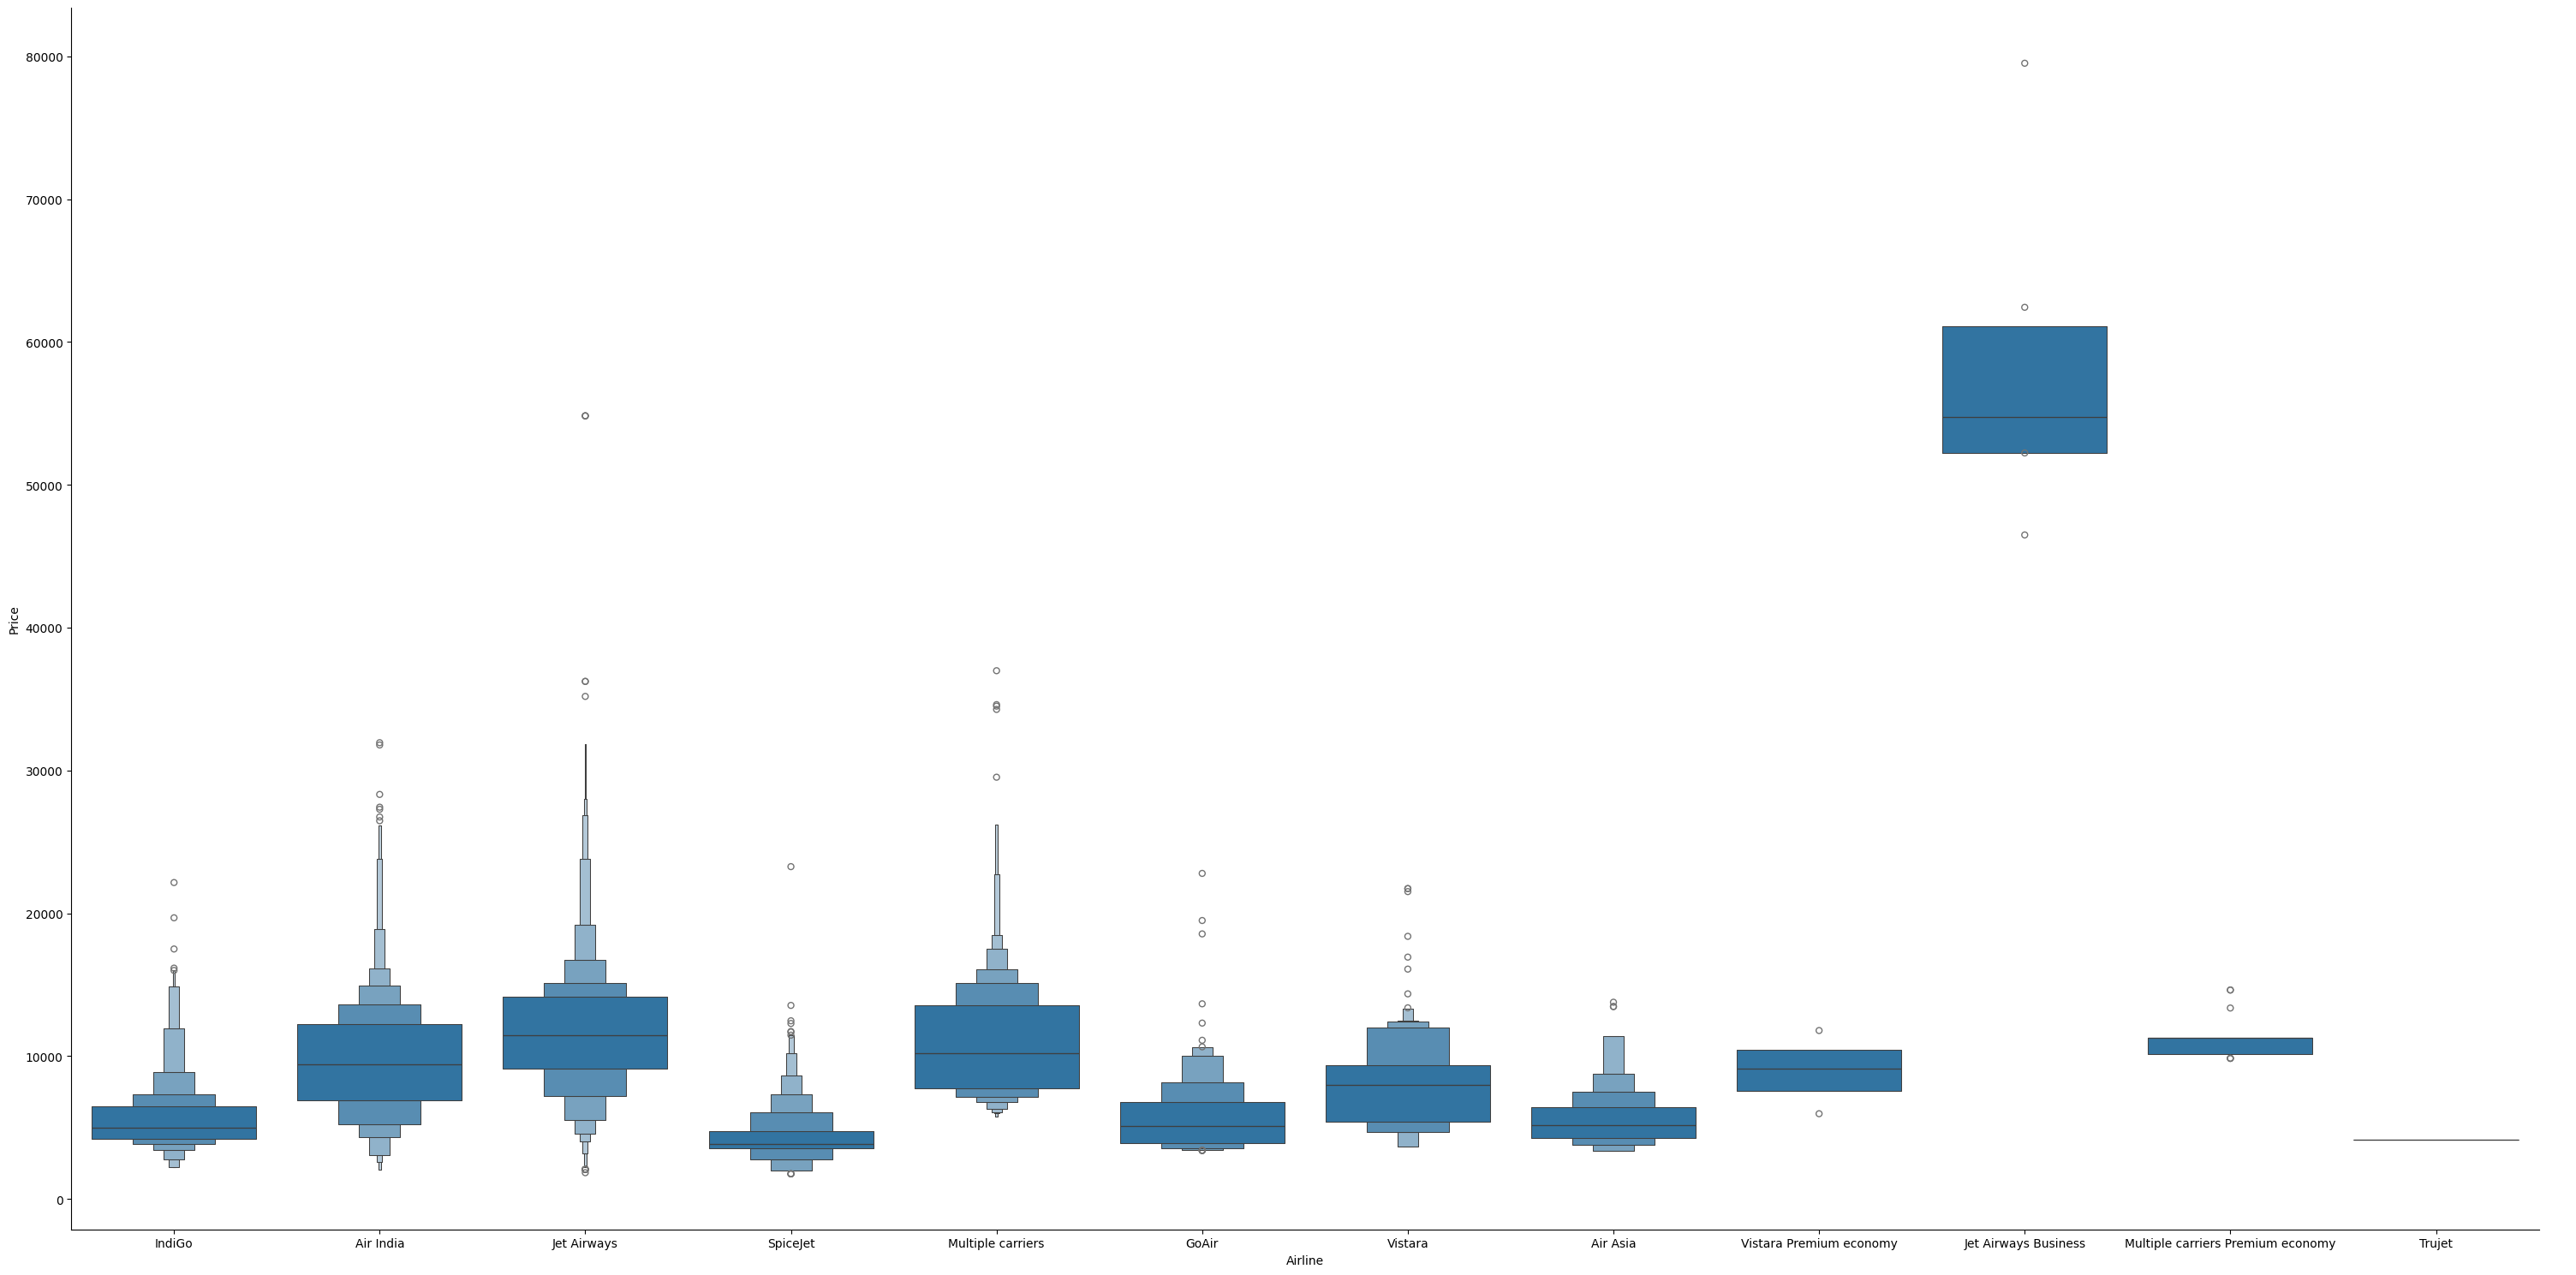

In [ ]:
sns.catplot(x='Airline',y='Price',data=data,height=15, aspect=2,kind='boxen')

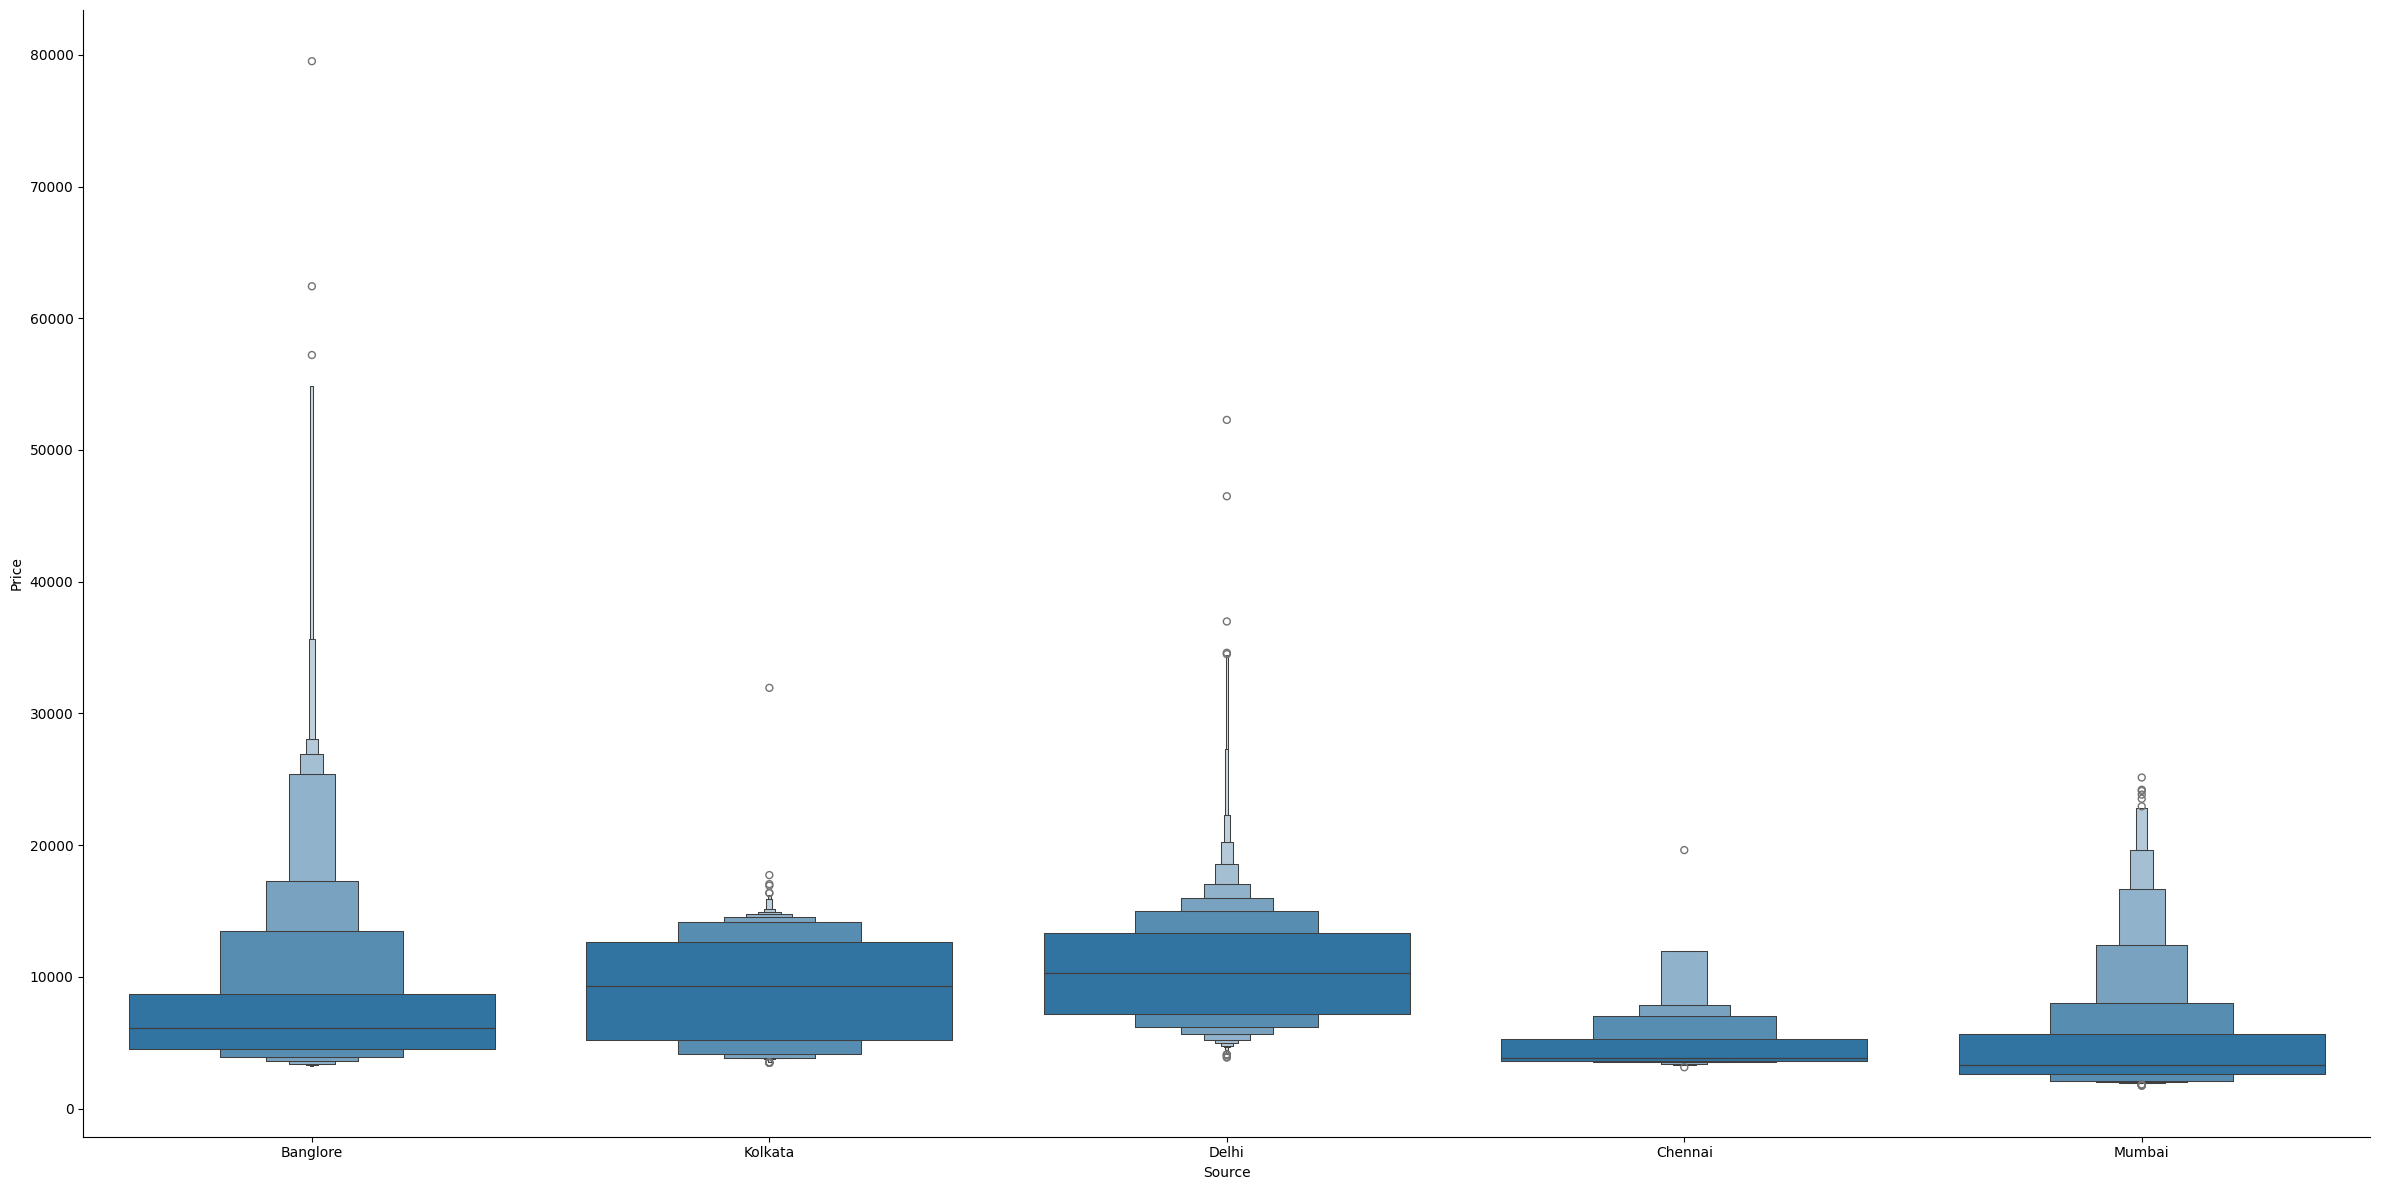

In [ ]:
sns.catplot(x='Source',y='Price',data=data,height=12, aspect=2,kind='boxen')

In [ ]:
airline=data[['Airline']]
airline=pd.get_dummies(airline,drop_first= True).astype(int)
airline.head(3)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
source=data[['Source']]
source=pd.get_dummies(source).astype(int)
source.head(3)

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0


In [ ]:
destination=data[['Destination']]
destination=pd.get_dummies(destination).astype(int)
destination.head(3)

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0


In [ ]:
data.drop(['Airline','Source','Destination','Additional_Info','Route','Duration'],axis=1,inplace=True)

In [ ]:
map={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
data['Total_Stops']=data['Total_Stops'].map(map).astype(int)

In [ ]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['journey_day']=data['Date_of_Journey'].dt.day
data['journry_month']=data['Date_of_Journey'].dt.month
data.drop('Date_of_Journey',axis=1,inplace=True)

<ipython-input-78-0ea91ff31553>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])


In [ ]:
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data['Arrival_hour']=data['Arrival_Time'].dt.hour
data['Arrival_min']=data['Arrival_Time'].dt.minute
data.drop('Arrival_Time',axis=1,inplace=True)

<ipython-input-79-c38a249a051e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])


In [ ]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['dep_hour']=data['Dep_Time'].dt.hour
data['dep_min']=data['Dep_Time'].dt.minute
data.drop('Dep_Time',axis=1,inplace=True)

<ipython-input-80-2f9965081e5d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_Time']=pd.to_datetime(data['Dep_Time'])


In [ ]:
data=pd.concat([data,airline,source,destination],axis=1)

In [ ]:
output_data=data['Price']

In [ ]:
input_data=data.drop('Price',axis=1)
output_data=data['Price']

## Splitting data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=42)

## RandomForest

In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
print(rf.score(x_test,y_test)*100)
print(rf.score(x_train,y_train)*100)

84.07290892244383
95.30925183617993
